In [3]:
import pandas as pd
import matplotlib.pyplot as plt

      book_id  num_users
0           1        973
1           2        400
2           3        287
3           4       1478
4           5       1293
...       ...        ...
9981     9996         17
9982     9997         22
9983     9998          6
9984     9999         88
9985    10000         25

[9986 rows x 2 columns]
      book_id                                           user_ids
0           1  [34499, 17096, 45790, 21418, 24191, 18050, 241...
1           2  [42116, 15573, 45195, 23386, 52359, 38412, 413...
2           3  [44202, 12866, 19333, 49868, 41685, 13766, 170...
3           4  [8699, 26577, 42350, 24368, 31485, 12357, 3014...
4           5  [5112, 19858, 13080, 29438, 34846, 8891, 4364,...
...       ...                                                ...
9981     9996  [10047, 15752, 14000, 46600, 47989, 9202, 3182...
9982     9997  [46910, 5584, 6623, 49911, 35938, 50362, 8015,...
9983     9998            [41657, 28279, 52930, 8858, 111, 19799]
9984     9999  [6404, 270

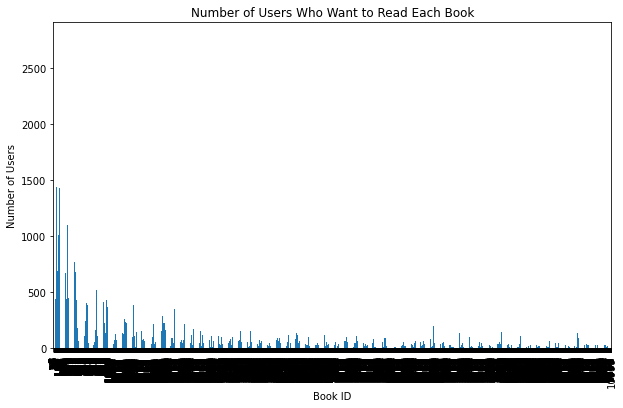

In [4]:
# Read the to_read.csv file into a pandas DataFrame
to_read_df = pd.read_csv('to_read.csv')

# Sort the DataFrame by time
to_read_df = to_read_df.sort_values('book_id')

# Count the number of users who want to read each book and create a new DataFrame
book_counts = to_read_df.groupby('book_id')['user_id'].nunique().reset_index()
book_counts = book_counts.rename(columns={'user_id': 'num_users'})

# Create a new DataFrame with user IDs grouped by book ID
user_ids = to_read_df.groupby('book_id')['user_id'].apply(list).reset_index()
user_ids = user_ids.rename(columns={'user_id': 'user_ids'})

# Print the results
print(book_counts)
print(user_ids)

# Get the book ID with the minimum value
min_book_id = to_read_df['book_id'].min()

# Get the book ID with the maximum value
max_book_id = to_read_df['book_id'].max()

# Print the results
print("Book ID with the minimum value: ", min_book_id)
print("Book ID with the maximum value: ", max_book_id)

# Group the data by book ID and count the number of unique users for each book
book_counts = to_read_df.groupby('book_id')['user_id'].nunique()

# Get the book ID with the minimum number of users
min_book_id = book_counts.idxmin()

# Get the book ID with the maximum number of users
max_book_id = book_counts.idxmax()

# Print the results
print("Book ID with the minimum number of users: ", min_book_id)
print("Book ID with the maximum number of users: ", max_book_id)

# Plot a bar chart of the book ID counts
book_counts.plot(kind='bar', figsize=(10, 6))

# Set the title and axis labels
plt.title('Number of Users Who Want to Read Each Book')
plt.xlabel('Book ID')
plt.ylabel('Number of Users')

# Show the plot
plt.show()


Book ratings by each user:
user_id  1      2      3      4      5      6      7      8      9      10     \
book_id                                                                         
1          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    4.0    NaN   
2          NaN    NaN    NaN    5.0    NaN    NaN    NaN    NaN    4.0    NaN   
3          NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    4.0    NaN   
4          5.0    NaN    3.0    4.0    NaN    NaN    NaN    3.0    NaN    5.0   
5          NaN    5.0    NaN    4.0    NaN    NaN    3.0    3.0    5.0    5.0   
...        ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9996       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
9997       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
9998       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
9999       NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1

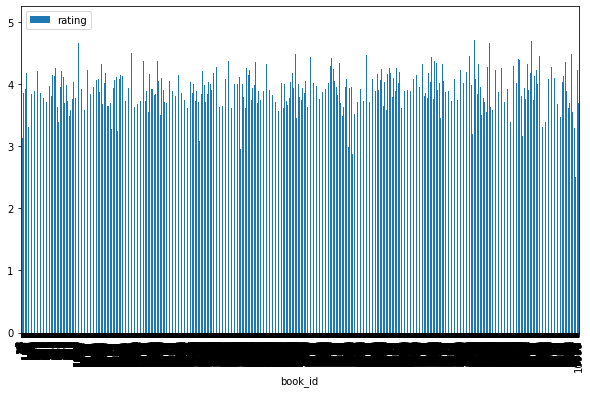

In [5]:
# Read the "ratings.csv" file
ratings_df = pd.read_csv("ratings.csv")

# Create a table that shows the book_id, its rating by each individual user
book_ratings_df = pd.pivot_table(ratings_df, values='rating', index='book_id', columns='user_id')

# Print the book ratings table
print("Book ratings by each user:")
print(book_ratings_df)

# Create a table that shows the rating distribution for each book
book_rating_distribution_df = pd.DataFrame(ratings_df.groupby('book_id')['rating'].value_counts())
book_rating_distribution_df = book_rating_distribution_df.unstack().fillna(0)

# Print the book rating distribution table
print("\nBook rating distribution:")
print(book_rating_distribution_df)

max_rating_df = book_rating_distribution_df.idxmax(axis=1).reset_index()
max_rating_df.columns = ['book_id', 'max_rating']

# Print the table
print("\nBooks with maximum particular rating:")
print(max_rating_df)

# Create a table that shows the average rating for each book
book_average_rating_df = pd.DataFrame(ratings_df.groupby('book_id')['rating'].mean())

# Print the book average rating table
print("\nBook average ratings:")
print(book_average_rating_df)

print(book_average_rating_df["rating"].min()) #minimum average rating

# Find the book with maximum average rating
max_rating_book = book_average_rating_df.idxmax()[0]
print(f"\nBook with maximum average rating: {max_rating_book}")
print(book_average_rating_df["rating"].max()) #maximum average rating

# Find the book with minimum average rating
min_rating_book = book_average_rating_df.idxmin()[0]
print(f"Book with minimum average rating: {min_rating_book}")

book_average_rating_df.plot(kind='bar', figsize=(10, 6))
plt.show()
# User that has given maximum rating and which rating is it
# Rating which was given maximum
# Average rating range book distribution


# Book which has minimum user demand and it's rating and author's name
# Look for other books from same author and look for their rating and what kind of books does he write

# Possible Questions
# Recommending books to a user based on his interest which matches to interest of other users by looking at the books they've read.
# Recommending books to a user based on his interest according to the category and rating of the books read by him in past.
# Find variation of rating for all the authors.



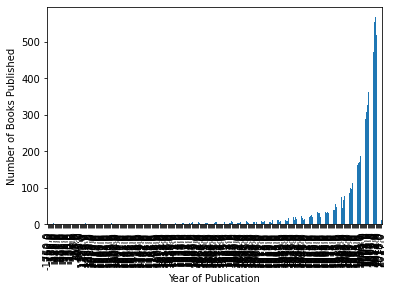

The year with the best rated books is: 1380.0
The best rated book among the books published in that year is:
title                        The Divan
authors                          Hafez
original_publication_year       1380.0
average_rating                    4.63
Name: 8945, dtype: object


In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the books data
books = pd.read_csv("books.csv")

# Sort books by year of publication
sorted_books = books.sort_values("original_publication_year")

# Plot the number of books published each year
books_per_year = sorted_books["original_publication_year"].value_counts().sort_index()
books_per_year.plot(kind="bar")
plt.xlabel("Year of Publication")
plt.ylabel("Number of Books Published")
plt.show()

# Find the 100 oldest and 100 most recently published books
oldest_books = sorted_books.head(100)
recent_books = sorted_books.tail(100)

# Create a table that shows the average rating of all of the books published in a year
average_ratings = sorted_books.groupby("original_publication_year").mean()["average_rating"]

# Find the year with the best rated books and the best rated book among the books published in that year
best_year = average_ratings.idxmax()
best_books = sorted_books[sorted_books["original_publication_year"] == best_year]
best_rated_book = best_books.loc[best_books["average_rating"].idxmax()]

# Print the results
print("The year with the best rated books is:", best_year)
print("The best rated book among the books published in that year is:")
print(best_rated_book[["title", "authors", "original_publication_year", "average_rating"]])


In [15]:
import pandas as pd

# Load the books data into a DataFrame
books_df = pd.read_csv('books.csv')

# Drop any rows with missing publication year data
books_df.dropna(subset=['original_publication_year'], inplace=True)

# Convert the publication year column to integers
books_df['original_publication_year'] = books_df['original_publication_year'].astype(int)

# Group the books by publication year and calculate the mean rating for each group
grouped = books_df.groupby('original_publication_year').agg({'average_rating': 'mean'})

# Sort the groups in descending order of their mean ratings
sorted_groups = grouped.sort_values('average_rating', ascending=False)

# Select the top book from each group
best_books = []
for year, group in books_df.groupby('original_publication_year'):
    top_book = group.loc[group['average_rating'].idxmax()]
    best_books.append(top_book)

# Create a DataFrame from the best books list
best_books_df = pd.DataFrame(best_books)

# Print the best book for each year
print(best_books_df[['original_publication_year', 'title', 'authors', 'average_rating']])


      original_publication_year  \
2075                      -1750   
2141                       -762   
6165                       -750   
78                         -720   
1119                       -560   
...                         ...   
459                        2013   
861                        2014   
1263                       2015   
1307                       2016   
9568                       2017   

                                                  title  \
2075                              The Epic of Gilgamesh   
2141                              The Iliad/The Odyssey   
6165                     The I Ching or Book of Changes   
78                                          The Odyssey   
1119                                     Aesop's Fables   
...                                                 ...   
459       Clockwork Princess (The Infernal Devices, #3)   
861      Words of Radiance (The Stormlight Archive, #2)   
1263             Queen of Shadows (Throne of Gla

In [16]:
import pandas as pd

# read the ratings file
ratings_df = pd.read_csv('ratings.csv')

# create a table that contains user_id and book_id of all the books they've read
read_books_df = ratings_df[ratings_df['rating'] >= 3][['user_id', 'book_id']]

# take an input for the user_id
input_user = input("Enter user ID to find similar readers: ")

# look for that user_id in the table
input_user_books = read_books_df[read_books_df['user_id'] == int(input_user)]['book_id'].tolist()

# search for other users who have read all or most of the books that the input user has read
similar_users = read_books_df[read_books_df['book_id'].isin(input_user_books)]['user_id'].unique()

# create a list of books that the similar users have read but the input user has not read
unseen_books = []
for user in similar_users:
    user_books = read_books_df[read_books_df['user_id'] == user]['book_id'].tolist()
    for book in user_books:
        if book not in input_user_books and book not in unseen_books:
            unseen_books.append(book)

# find the most common book that is not read by our input user
if len(unseen_books) == 0:
    print("No book found that other similar readers have read and the input user has not read.")
else:
    common_book = max(set(unseen_books), key=unseen_books.count)
    print(f"The most common book that other similar readers have read and the input user has not read is {common_book}.")


Enter user ID to find similar readers: 670
The most common book that other similar readers have read and the input user has not read is 2.


In [18]:
import pandas as pd

# Load the books.csv file into a dataframe
df_books = pd.read_csv('books.csv')

# Group the dataframe by authors and select the book with the highest average rating in each group
df_best_books = df_books.loc[df_books.groupby('authors')['average_rating'].idxmax()]
# Group the dataframe by authors and select the book with the lowest average rating in each group
df_worst_books = df_books.loc[df_books.groupby('authors')['average_rating'].idxmin()]

# Display the best book of each author
print(df_best_books[['authors', 'title', 'average_rating']].sort_values(by='authors'))

# Display the worst book of each author
print(df_worst_books[['authors', 'title', 'average_rating']].sort_values(by='authors'))

                            authors  \
4264               A. Manette Ansay   
6175            A. Meredith Walters   
2876  A.A. Milne, Ernest H. Shepard   
7656                   A.C. Gaughen   
9129                    A.G. Howard   
...                             ...   
4590                    منى المرشود   
9220                  نور عبدالمجيد   
5372                      ياسر حارب   
2032                     يوسف زيدان   
6197     يوسف زيدان, Youssef Ziedan   

                                                  title  average_rating  
4264                                       Vinegar Hill            3.36  
6175    Find You in the Dark (Find You in the Dark, #1)            3.98  
2876  The Complete Tales and Poems of Winnie-the-Poo...            4.49  
7656                              Scarlet (Scarlet, #1)            3.95  
9129                          Unhinged (Splintered, #2)            4.25  
...                                                 ...             ...  
4590         

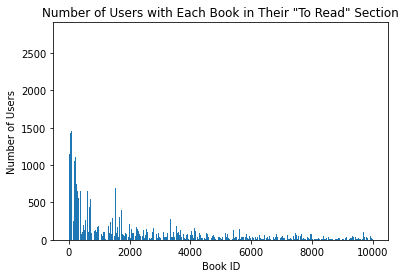

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the "to_read.csv" file into a dataframe
to_read_df = pd.read_csv("to_read.csv")

# Group the dataframe by book_id and count the number of users for each book
to_read_counts = to_read_df.groupby("book_id")["user_id"].count().reset_index()

# Rename the "user_id" column to "num_users"
to_read_counts = to_read_counts.rename(columns={"user_id": "num_users"})

# Plot a bar graph of the number of users who have each book in their "to read" section
plt.bar(to_read_counts["book_id"], to_read_counts["num_users"])
plt.xlabel("Book ID")
plt.ylabel("Number of Users")
plt.title("Number of Users with Each Book in Their \"To Read\" Section")
plt.show()


/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


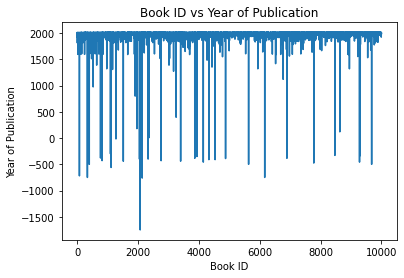

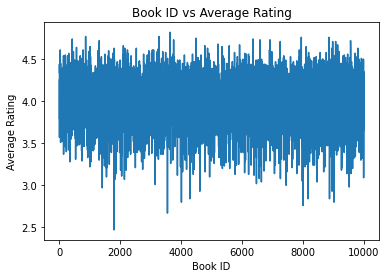

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the books.csv file into a dataframe
books_df = pd.read_csv("books.csv")

# Create a new dataframe with book_id, original_publication_year and average_rating columns
book_pub_rating_df = books_df[['book_id', 'original_publication_year', 'average_rating']]

# Drop rows with null values in original_publication_year column
book_pub_rating_df.dropna(subset=['original_publication_year'], inplace=True)

# Sort the dataframe by book_id in ascending order
book_pub_rating_df.sort_values(by='book_id', inplace=True)

# Plot the book_id vs year of publication graph
plt.plot(book_pub_rating_df['book_id'], book_pub_rating_df['original_publication_year'])
plt.title("Book ID vs Year of Publication")
plt.xlabel("Book ID")
plt.ylabel("Year of Publication")
plt.show()

# Plot the book_id vs average_rating graph
plt.plot(book_pub_rating_df['book_id'], book_pub_rating_df['average_rating'])
plt.title("Book ID vs Average Rating")
plt.xlabel("Book ID")
plt.ylabel("Average Rating")
plt.show()


In [27]:
import pandas as pd

# Load the book_tags.csv file
book_tags = pd.read_csv("book_tags.csv")

# Group the tags by book id and tag id, and sum the count
grouped_tags = book_tags.groupby(["goodreads_book_id", "tag_id"]).sum()

# Reset the index to make the book id and tag id columns
# back to regular columns instead of a multi-index
grouped_tags = grouped_tags.reset_index()

# Sort the values by count in descending order for each book
sorted_tags = grouped_tags.sort_values(["goodreads_book_id", "count"], ascending=[True, False])

# Group the sorted tags by book id and get the top 3 tags for each book
top_3_tags = sorted_tags.groupby("goodreads_book_id").head(3)

# Display the result
print(top_3_tags)

# Read the tags.csv file to get the tag names
tags_df = pd.read_csv("tags.csv")

# Merge the top_tags_df with the tags_df to get the tag names
merged_tags_df = pd.merge(top_3_tags, tags_df, on="tag_id")

# Add the tag_name column to the table
merged_tags_df = merged_tags_df[["goodreads_book_id", "tag_id", "tag_name", "count"]]

print(merged_tags_df)


        goodreads_book_id  tag_id   count
90                      1   30574  167697
31                      1   11305   37174
37                      1   11557   34173
187                     2   30574   24549
126                     2    8717    3516
...                   ...     ...     ...
999756           32848471   12680      80
999780           32848471   21387      78
999902           33288638   30574   14116
999839           33288638    8717    1196
999882           33288638   26138     385

[30000 rows x 3 columns]
       goodreads_book_id  tag_id       tag_name   count
0                      1   30574        to-read  167697
1                      2   30574        to-read   24549
2                      3   30574        to-read  496107
3                      8   30574        to-read    2823
4                     10   30574        to-read    3226
...                  ...     ...            ...     ...
29995           24473465   28466            spy      45
29996           244734

                 tag_name      count
30574             to-read  140718761
8717    currently-reading    7507958
11557           favorites    4503173
11743             fiction    3688819
11305             fantasy    3548157
33114         young-adult    1848306
7457             classics    1756920
5207          books-i-own    1317235
26138             romance    1231926
22743               owned    1224279
32989                  ya     898334
20939             mystery     872282
21689         non-fiction     857901
14487  historical-fiction     815421
27199              series     782637
26837     science-fiction     703866
26771              sci-fi     597325
22973          paranormal     542559
17213              kindle     506882
8055         contemporary     486001
4949            book-club     446685
18045             library     429171
11590          favourites     423289
22753         owned-books     417384
14821              horror     415467
9221              default     405326
3

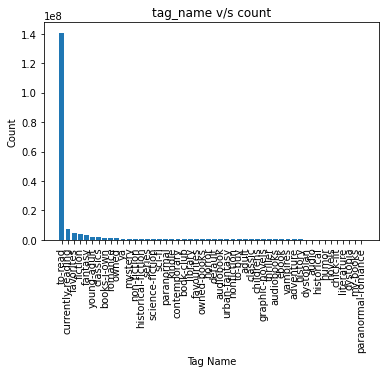

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

book_tags = pd.read_csv("book_tags.csv")
tags = pd.read_csv("tags.csv")

book_tags_with_name = pd.merge(book_tags, tags, on="tag_id")
tag_counts = book_tags_with_name.groupby("tag_name").agg({"count": "sum"}).reset_index()
top_50_tags = tag_counts.sort_values(by="count", ascending=False).head(50)

print(top_50_tags)

plt.bar(top_50_tags["tag_name"], top_50_tags["count"])
plt.title("tag_name v/s count")
plt.xlabel("Tag Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

In [3]:
import pandas as pd

# Load the to_read.csv file
to_read_df = pd.read_csv('to_read.csv')
# read the books.csv file
books_df = pd.read_csv('books.csv')

# Group the dataframe by book_id and count the number of unique users who have the book in their to-read list
user_count_df = to_read_df.groupby('book_id')['user_id'].nunique().reset_index()

# Rename the columns
user_count_df.columns = ['book_id', 'num_users_to_read']

# create a new dataframe with book_id and book_count columns
book_count_df = books_df[['book_id', 'books_count']]

# merge both tables on book_id
merged_df = pd.merge(book_count_df, user_count_df, on='book_id', how='outer')

# fill missing values with 0
merged_df.fillna(0, inplace=True)

merged_df['count_diff'] = merged_df['num_users_to_read'] - merged_df['books_count']
filtered_df = merged_df[merged_df['books_count'] < merged_df['num_users_to_read']]

# print the resulting dataframe
print(merged_df)
print("Book that are required to the users")
print(filtered_df)

      book_id  books_count  num_users_to_read  count_diff
0         1.0        272.0              599.0       327.0
1         2.0        491.0              143.0      -348.0
2         3.0        226.0              128.0       -98.0
3         4.0        487.0              584.0        97.0
4         5.0       1356.0              532.0      -824.0
...       ...          ...                ...         ...
9892   9996.0          0.0                3.0         3.0
9893   9997.0          0.0                7.0         7.0
9894   9998.0          0.0                1.0         1.0
9895   9999.0          0.0               58.0        58.0
9896  10000.0          0.0               13.0        13.0

[9897 rows x 4 columns]
Book that are required to the users
      book_id  books_count  num_users_to_read  count_diff
0         1.0        272.0              599.0       327.0
3         4.0        487.0              584.0        97.0
5         6.0        226.0              328.0       102.0
7         8

In [49]:
import pandas as pd

# Load the books.csv file
books_df = pd.read_csv('books.csv')

# Group the dataframe by author and calculate the average rating for each author
author_ratings_df = books_df.groupby('authors')['average_rating'].mean().reset_index()

# Merge the dataframe with the original dataframe to get the book_id for each author
author_ratings_df = pd.merge(author_ratings_df, books_df[['book_id', 'authors']], on='authors')

# Rename the columns
author_ratings_df.columns = ['author', 'avg_rating', 'book_id']

# Sort the dataframe by author and avg_rating
author_ratings_df = author_ratings_df.sort_values(['author', 'avg_rating'], ascending=[True, False])

# Print the resulting dataframe
print(author_ratings_df)

# Group the original dataframe by author and calculate the standard deviation for the ratings column
author_rating_variation_df = books_df.groupby('authors')['average_rating'].std().reset_index()

# Rename the columns
author_rating_variation_df.columns = ['author', 'rating_variation']

# Print the resulting dataframe
print(author_rating_variation_df)
# Merge the two dataframes
author_ratings_df = pd.merge(author_ratings_df, author_rating_variation_df, on='author')

# Calculate the variation in rating for each book
author_ratings_df['rating_variation'] = author_ratings_df['avg_rating'] - author_ratings_df['rating_variation']

# Print the resulting dataframe
print(author_ratings_df)


                             author  avg_rating  book_id
0                  A. Manette Ansay    3.360000     4265
1               A. Meredith Walters    3.945000     5888
2               A. Meredith Walters    3.945000     6176
3     A.A. Milne, Ernest H. Shepard    4.386667      444
4     A.A. Milne, Ernest H. Shepard    4.386667     1545
...                             ...         ...      ...
9995                      ياسر حارب    3.550000     5373
9996                     يوسف زيدان    3.535000     2033
9997                     يوسف زيدان    3.535000     7450
9998     يوسف زيدان, Youssef Ziedan    3.370000     6198
9999     يوسف زيدان, Youssef Ziedan    3.370000     7294

[10000 rows x 3 columns]
                             author  rating_variation
0                  A. Manette Ansay               NaN
1               A. Meredith Walters          0.049497
2     A.A. Milne, Ernest H. Shepard          0.063140
3                      A.C. Gaughen               NaN
4                   

In [52]:
import pandas as pd

# Load the books.csv file
books_df = pd.read_csv('books.csv')

# Create a new DataFrame with book_id, average_rating, and ratings_count columns
ratings_df = books_df[['book_id', 'average_rating', 'ratings_count']]

# Print the resulting DataFrame
print(ratings_df)

sorted_rating_count = ratings_df.sort_values(by="ratings_count", ascending=False)
print(sorted_rating_count)

sorted_average_rating = ratings_df.sort_values(by="average_rating", ascending=False)
print(sorted_average_rating)


      book_id  average_rating  ratings_count
0           1            4.34        4780653
1           2            4.44        4602479
2           3            3.57        3866839
3           4            4.25        3198671
4           5            3.89        2683664
...       ...             ...            ...
9995     9996            4.09          17204
9996     9997            4.25          12582
9997     9998            4.35           9421
9998     9999            3.65          11279
9999    10000            4.00           9162

[10000 rows x 3 columns]
      book_id  average_rating  ratings_count
0           1            4.34        4780653
1           2            4.44        4602479
2           3            3.57        3866839
3           4            4.25        3198671
4           5            3.89        2683664
...       ...             ...            ...
7802     7803            3.64           3508
9113     9114            4.48           3427
6771     6772            4.18